In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged.csv to merged (3).csv


In [ ]:
import pandas as pd 
df=pd.read_csv('merged.csv', encoding='iso-8859-1', error_bad_lines=False) #skip bad lines
df['tweet_text']=df['tweet_text'].apply(str) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 204: expected 3 fields, saw 5\nSkipping line 550: expected 3 fields, saw 5\n'


In [ ]:
df.shape

(631, 3)

In [ ]:
df.head()

,tweet_text,tweet_location,tweet_created
0,@PopCrave ?,,Tue Aug 23 13:36:01 +0000 2022
1,@PopCrave whyÛ_.,loona concert,Tue Aug 23 13:36:01 +0000 2022
2,@PopCrave cardi needs it and she needs it BADLY,blue dress is my blueprint,Tue Aug 23 13:36:03 +0000 2022
3,@PopCrave cardi will be purchasing to cover up...,NaN,Tue Aug 23 13:36:05 +0000 2022
4,@PopCrave she needs to release fenty music,He/Him | Black,Tue Aug 23 13:36:05 +0000 2022


In [ ]:
import re

In [ ]:
def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

df["clean"] = df["tweet_text"].map(lambda x: cleaner(x))

In [ ]:
df.head()

,tweet_text,tweet_location,tweet_created,clean
0,@PopCrave ?,,Tue Aug 23 13:36:01 +0000 2022,?
1,@PopCrave whyÛ_.,loona concert,Tue Aug 23 13:36:01 +0000 2022,whyÛ_.
2,@PopCrave cardi needs it and she needs it BADLY,blue dress is my blueprint,Tue Aug 23 13:36:03 +0000 2022,cardi needs it and she needs it BADLY
3,@PopCrave cardi will be purchasing to cover up...,NaN,Tue Aug 23 13:36:05 +0000 2022,cardi will be purchasing to cover up those bo...
4,@PopCrave she needs to release fenty music,He/Him | Black,Tue Aug 23 13:36:05 +0000 2022,she needs to release fenty music


In [ ]:
from textblob import TextBlob
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
df['Subjectivity']=df['tweet_text'].apply(getTextSubjectivity)
df['Polarity']=df['tweet_text'].apply(getTextPolarity) #polarity<0 = -ve sentiment, =0 =neutral and >0 = +ve
df.tail(12)

,tweet_text,tweet_location,tweet_created,clean,Subjectivity,Polarity
619,@Trendmood https://t.co/EzF37xPvGx,"Charlotte, NC",8/22/22 17:26,https://t.co/EzF37xPvGx,0.000000,0.000000
620,@Trendmood My god look at the QT ratio ÷Êü...,"Seattle, WA",8/22/22 17:25,My god look at the QT ratio ÷Êü÷Êü÷Êü,0.000000,0.000000
621,@Trendmood The ketchup bags are little tiny sa...,NaN,8/22/22 17:24,"The ketchup bags are little tiny sachets, are...",0.583333,0.036458
622,@Trendmood @AK8O1004 https://t.co/YfsqT0zV2v,Canada,8/22/22 17:22,https://t.co/YfsqT0zV2v,0.000000,0.000000
623,@Trendmood who asked for this? https://t.co/ZV...,"trenches, relax",8/22/22 17:20,who asked for this? https://t.co/ZV8oG6WfZa,0.000000,0.000000
624,@Trendmood From the marketing executive that b...,"Oregon, USA",8/22/22 17:18,From the marketing executive that brought you...,0.000000,0.000000
625,@Trendmood what was the reason?,"Chicago, IL",8/22/22 17:17,what was the reason?,0.000000,0.000000
626,@Trendmood IÛªm so confused what is this lol,TX _ÙÓ MS,8/22/22 17:15,IÛªm so confused what is this lol,0.700000,0.200000
627,@Trendmood was Rihanna craving ketchup during ...,"Dallas, TX",8/22/22 17:12,"was Rihanna craving ketchup during pregnancy, or",0.000000,0.000000
628,@Trendmood But what do you do with the gloss p...,QuÌ©bec,8/22/22 17:11,But what do you do with the gloss packet once...,0.000000,0.000000


In [ ]:
df1=df.groupby("tweet_location").size()
df1.shape

(334,)

In [ ]:
df['AVG_Polarity'] = df.groupby('tweet_location').Polarity.transform('mean')
df = df.dropna(subset=["AVG_Polarity"]) #dropnNaN because was affecting conversion to int
df.tail(8)

,tweet_text,tweet_location,tweet_created,clean,Subjectivity,Polarity,AVG_Polarity
622,@Trendmood @AK8O1004 https://t.co/YfsqT0zV2v,Canada,8/22/22 17:22,https://t.co/YfsqT0zV2v,0.0,0.0,0.000000
623,@Trendmood who asked for this? https://t.co/ZV...,"trenches, relax",8/22/22 17:20,who asked for this? https://t.co/ZV8oG6WfZa,0.0,0.0,0.000000
624,@Trendmood From the marketing executive that b...,"Oregon, USA",8/22/22 17:18,From the marketing executive that brought you...,0.0,0.0,0.000000
625,@Trendmood what was the reason?,"Chicago, IL",8/22/22 17:17,what was the reason?,0.0,0.0,-0.082386
626,@Trendmood IÛªm so confused what is this lol,TX _ÙÓ MS,8/22/22 17:15,IÛªm so confused what is this lol,0.7,0.2,0.200000
627,@Trendmood was Rihanna craving ketchup during ...,"Dallas, TX",8/22/22 17:12,"was Rihanna craving ketchup during pregnancy, or",0.0,0.0,0.000000
628,@Trendmood But what do you do with the gloss p...,QuÌ©bec,8/22/22 17:11,But what do you do with the gloss packet once...,0.0,0.0,0.000000
629,@Trendmood fun for who?,FL,8/22/22 17:09,fun for who?,0.2,0.3,0.300000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0,

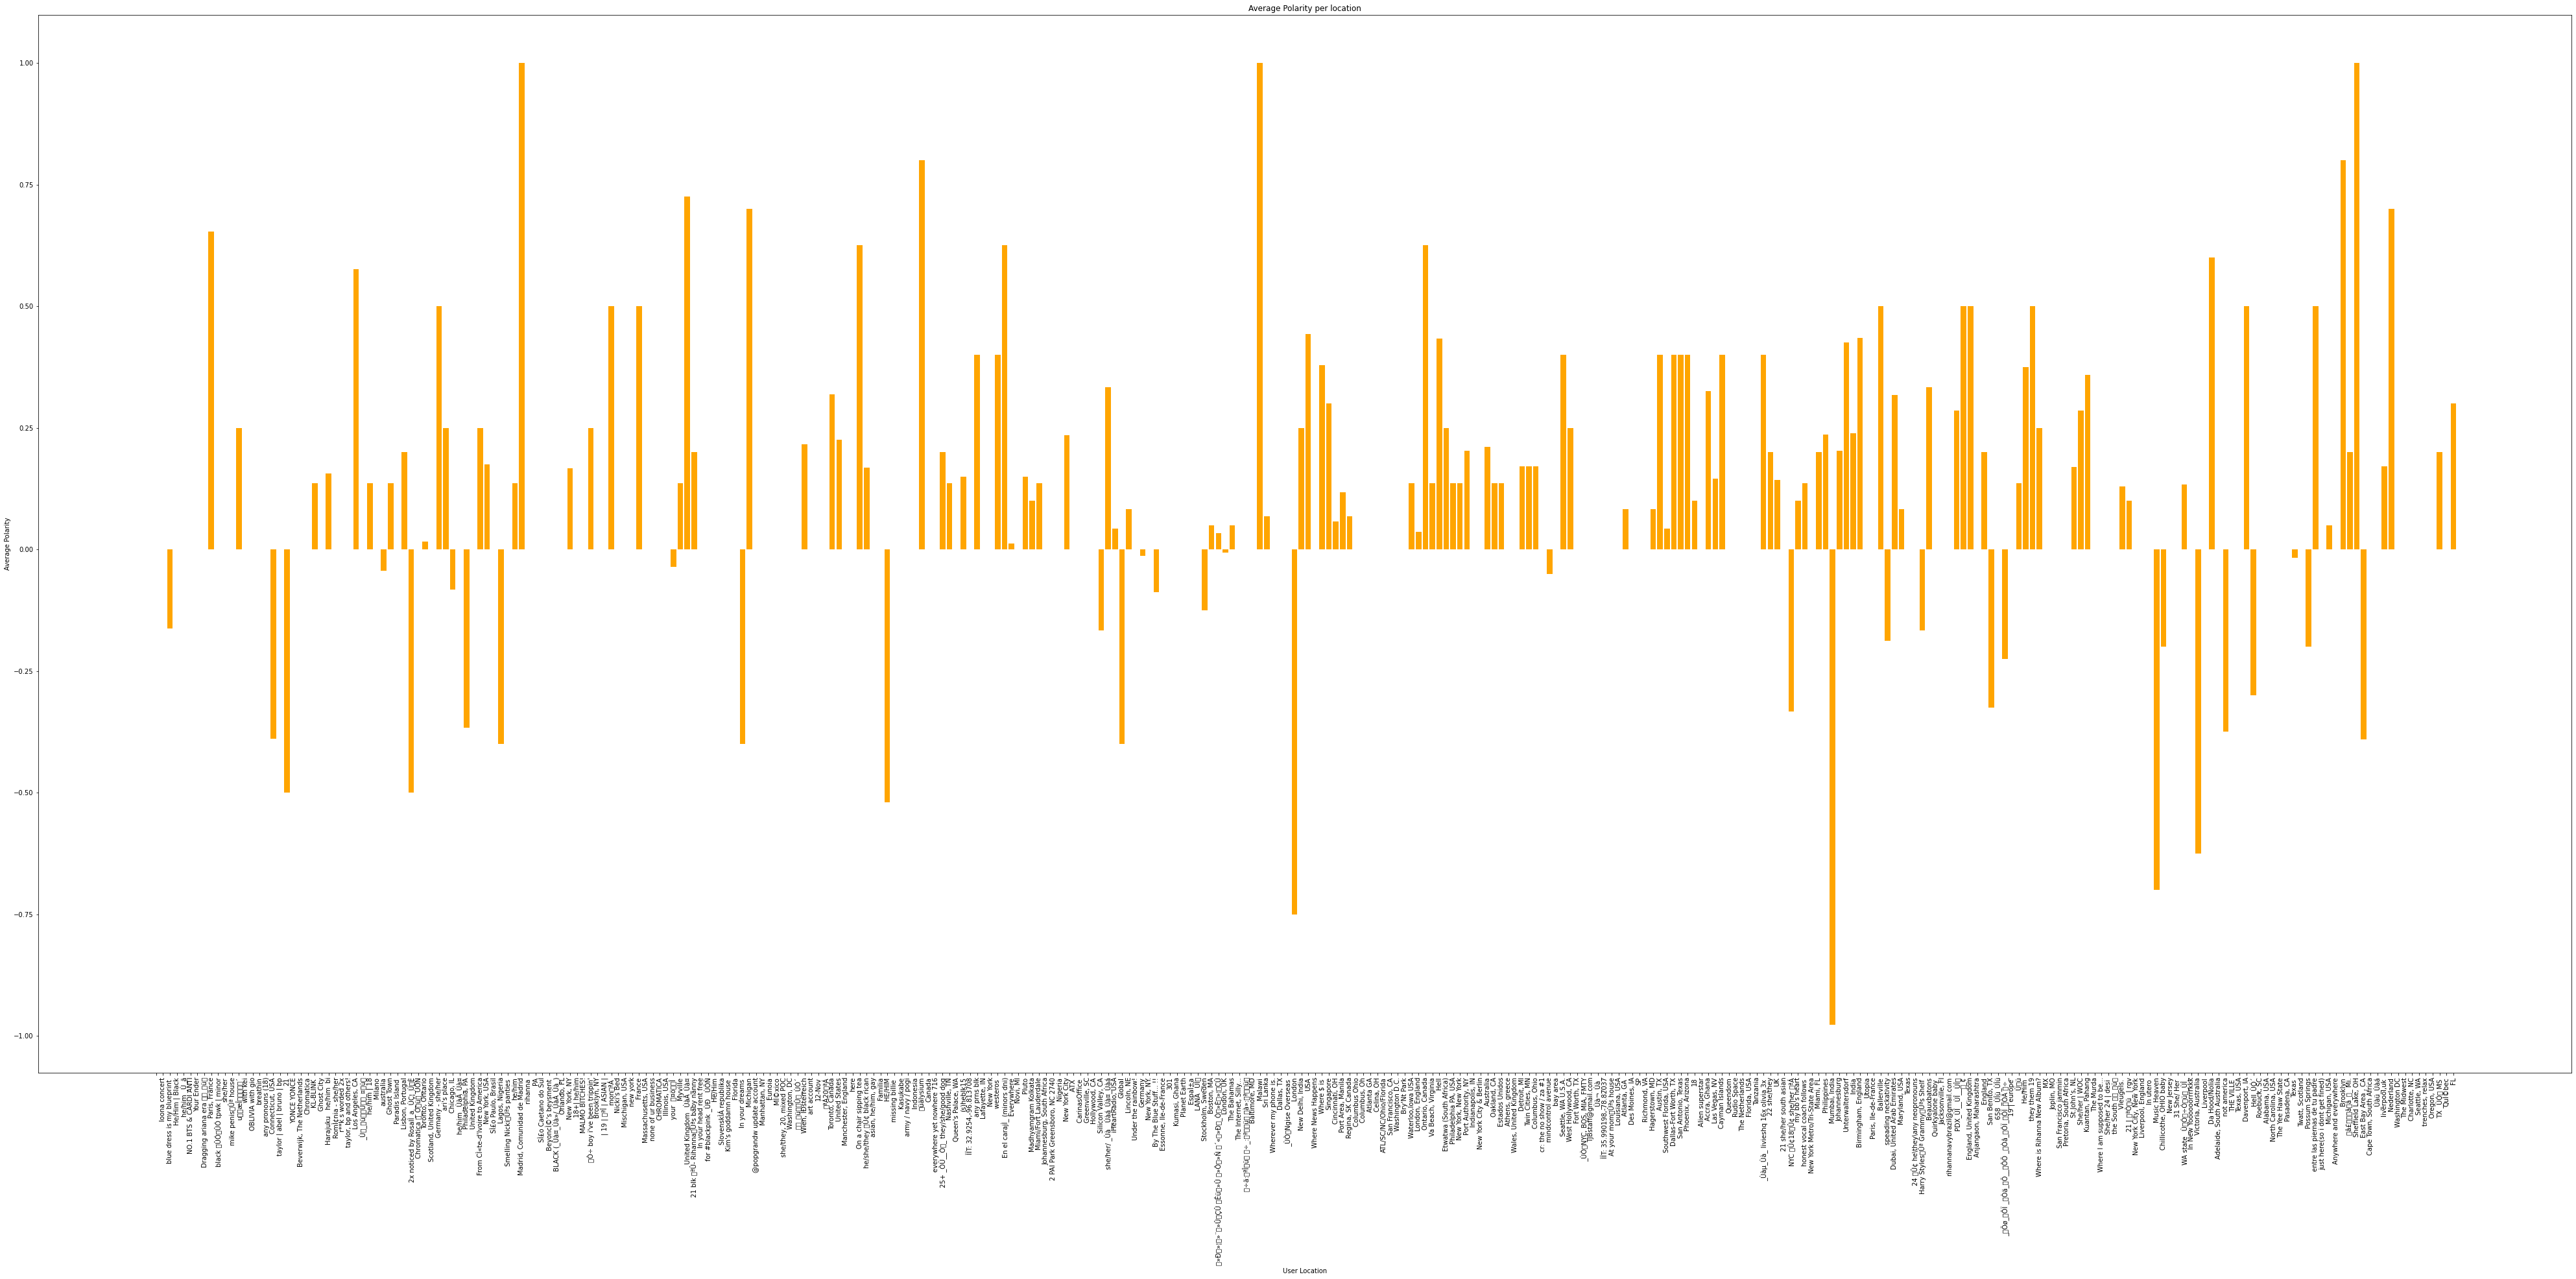

In [ ]:
fig, ax = plt.subplots(figsize=(70,30))
ax.bar(df["tweet_location"], df["AVG_Polarity"], color="orange")
plt.title("Average Polarity per location") 
plt.xlabel("User Location")
plt.ylabel("Average Polarity") 
plt.xticks(rotation = 90)
plt.show()

<class 'set'>


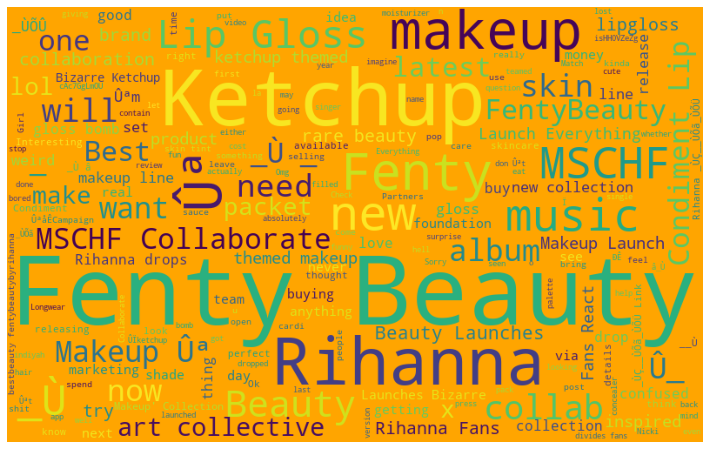

In [ ]:
all_words = ' '.join([text for text in df['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stop_words, background_color="orange", width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


from wordcloud import STOPWORDS

print(type(STOPWORDS))

stop_words = STOPWORDS.update(["https", "co", "RT", "t", "s", "_ù_", "amp", "û", "_ù", "a", "û_"])


plt.figure( figsize=(15,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()